In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
### Create the Bidirectional LSTM model
from random import random
from numpy import array
from numpy import cumsum
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [2]:
df=pd.read_csv('train-2 copy.csv',parse_dates=True)
df.head()

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [4]:
df.shape

(1017209, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
df2=df.reindex(index=df.index[::-1])

In [7]:
df2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1


In [8]:
df2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
4,5,5,2015-07-31,4822,559,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
0,1,5,2015-07-31,5263,555,1,1,0,1


In [9]:
atr2=df2[df2.Store==733]

In [10]:
atr2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1015712,733,3,2013-01-02,12477,3121,1,0,0,1
1014597,733,4,2013-01-03,12639,2978,1,0,0,1
1013482,733,5,2013-01-04,12078,3042,1,0,0,1
1012367,733,6,2013-01-05,10674,2694,1,0,0,0


In [11]:
atr2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5192,733,1,2015-07-27,15907,3282,1,1,0,1
4077,733,2,2015-07-28,14433,3148,1,1,0,1
2962,733,3,2015-07-29,14145,3184,1,1,0,1
1847,733,4,2015-07-30,14531,3145,1,1,0,1
732,733,5,2015-07-31,16625,3644,1,1,0,1


In [12]:
atr2.shape

(942, 9)

In [13]:
atr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 1016827 to 732
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          942 non-null    int64 
 1   DayOfWeek      942 non-null    int64 
 2   Date           942 non-null    object
 3   Sales          942 non-null    int64 
 4   Customers      942 non-null    int64 
 5   Open           942 non-null    int64 
 6   Promo          942 non-null    int64 
 7   StateHoliday   942 non-null    object
 8   SchoolHoliday  942 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 73.6+ KB


In [14]:
atr2.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,942.0,942.000000,942.000000,942.000000,942.0,942.000000,942.000000
mean,733.0,3.997877,14933.288747,3403.458599,1.0,0.382166,0.180467
std,0.0,1.998404,1838.044097,338.490827,0.0,0.486175,0.384780
min,733.0,1.000000,6838.000000,1329.000000,1.0,0.000000,0.000000
25%,733.0,2.000000,13698.500000,3209.000000,1.0,0.000000,0.000000
50%,733.0,4.000000,14795.500000,3393.000000,1.0,0.000000,0.000000
75%,733.0,6.000000,16092.000000,3586.750000,1.0,1.000000,0.000000
max,733.0,7.000000,22137.000000,4645.000000,1.0,1.000000,1.000000


In [15]:
atr2.Sales.value_counts()

15383    3
16396    3
13070    3
15563    3
15907    3
        ..
19118    1
17824    1
15813    1
18194    1
16625    1
Name: Sales, Length: 867, dtype: int64

In [16]:
atr2=atr2.set_index('Date')

In [17]:
atr2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,733,2,10765,2377,1,0,a,1
2013-01-02,733,3,12477,3121,1,0,0,1
2013-01-03,733,4,12639,2978,1,0,0,1
2013-01-04,733,5,12078,3042,1,0,0,1
2013-01-05,733,6,10674,2694,1,0,0,0


In [18]:
atr2=atr2.drop(columns=['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'])

In [19]:
atr2.head()

,Sales
Date,
2013-01-01,10765
2013-01-02,12477
2013-01-03,12639
2013-01-04,12078
2013-01-05,10674


In [20]:
atr2.tail()

,Sales
Date,
2015-07-27,15907
2015-07-28,14433
2015-07-29,14145
2015-07-30,14531
2015-07-31,16625


<AxesSubplot:xlabel='Date'>

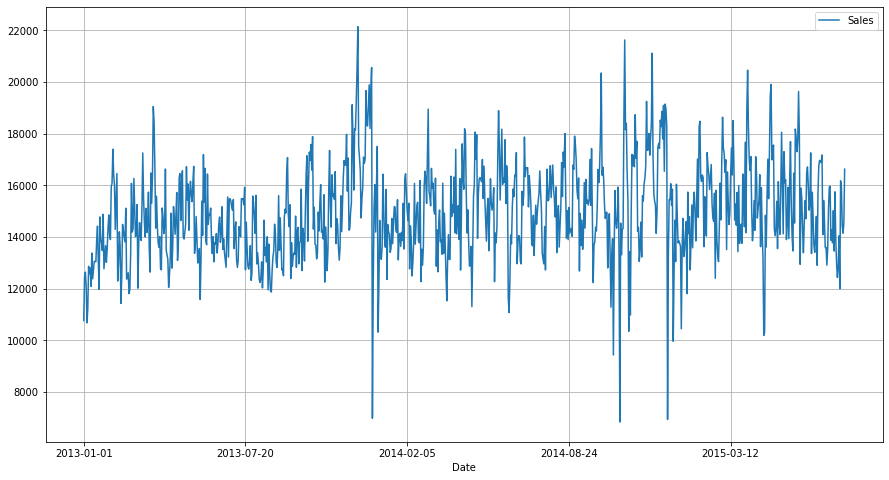

In [21]:
atr2.plot(figsize=(15,8), grid=True)

In [22]:
df1=atr2.reset_index()['Sales']

In [23]:
df1.shape

(942,)

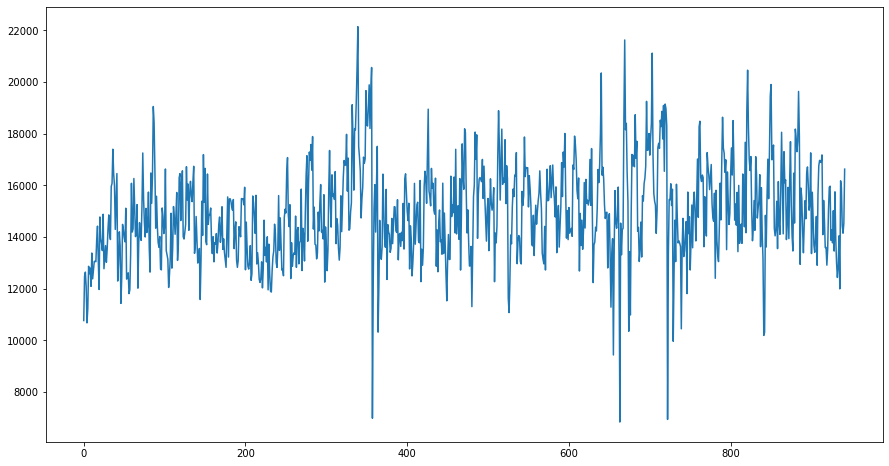

In [24]:
plt.rcParams['figure.figsize']=[15,8]
plt.plot(df1)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.5,1)) ## Scaling range is btw 0-1.
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [26]:
df1

array([[0.62834172],
       [0.68429309],
       [0.68958755],
       [0.67125302],
       [0.62536767],
       [0.64340807],
       [0.69697366],
       [0.68756128],
       [0.69465325],
       [0.67157984],
       [0.71373946],
       [0.68105759],
       [0.69249624],
       [0.70311785],
       [0.70334662],
       [0.70272567],
       [0.73001503],
       [0.74772861],
       [0.70367344],
       [0.66765802],
       [0.75936336],
       [0.73177985],
       [0.72596248],
       [0.71681156],
       [0.76276227],
       [0.69386888],
       [0.7095235 ],
       [0.72311916],
       [0.70200667],
       [0.71916465],
       [0.7444931 ],
       [0.76194523],
       [0.7374665 ],
       [0.73083208],
       [0.79789529],
       [0.80188248],
       [0.84502255],
       [0.81390941],
       [0.79923524],
       [0.74364338],
       [0.78014903],
       [0.81426891],
       [0.67831231],
       [0.70001307],
       [0.7405386 ],
       [0.72289038],
       [0.65004249],
       [0.683

In [27]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [28]:
training_size,test_size

(612, 330)

In [29]:
print(train_data)
print('\n')
print(atr2.iloc[0:612]) #train

[[0.62834172]
 [0.68429309]
 [0.68958755]
 [0.67125302]
 [0.62536767]
 [0.64340807]
 [0.69697366]
 [0.68756128]
 [0.69465325]
 [0.67157984]
 [0.71373946]
 [0.68105759]
 [0.69249624]
 [0.70311785]
 [0.70334662]
 [0.70272567]
 [0.73001503]
 [0.74772861]
 [0.70367344]
 [0.66765802]
 [0.75936336]
 [0.73177985]
 [0.72596248]
 [0.71681156]
 [0.76276227]
 [0.69386888]
 [0.7095235 ]
 [0.72311916]
 [0.70200667]
 [0.71916465]
 [0.7444931 ]
 [0.76194523]
 [0.7374665 ]
 [0.73083208]
 [0.79789529]
 [0.80188248]
 [0.84502255]
 [0.81390941]
 [0.79923524]
 [0.74364338]
 [0.78014903]
 [0.81426891]
 [0.67831231]
 [0.70001307]
 [0.7405386 ]
 [0.72289038]
 [0.65004249]
 [0.68380286]
 [0.74995098]
 [0.74312047]
 [0.73364272]
 [0.72792339]
 [0.77040983]
 [0.68076345]
 [0.68239754]
 [0.68870514]
 [0.66239624]
 [0.66720047]
 [0.71226878]
 [0.80191516]
 [0.74027714]
 [0.74436238]
 [0.80799399]
 [0.77188052]
 [0.73449245]
 [0.74063664]
 [0.77505066]
 [0.66932479]
 [0.72583175]
 [0.75210798]
 [0.73504804]
 [0.72

In [30]:
print(test_data)
print('\n')
print(atr2.iloc[612:])  #test

[[0.80864762]
 [0.69099288]
 [0.76387346]
 [0.72328257]
 [0.75534349]
 [0.71847833]
 [0.74102883]
 [0.8029283 ]
 [0.74534283]
 [0.8068828 ]
 [0.77665207]
 [0.78057389]
 [0.77446238]
 [0.78031244]
 [0.83211321]
 [0.7740702 ]
 [0.84587228]
 [0.76148768]
 [0.67631871]
 [0.72419766]
 [0.72756389]
 [0.74632329]
 [0.74171514]
 [0.76965815]
 [0.81936728]
 [0.80279757]
 [0.82508661]
 [0.86521995]
 [0.94146676]
 [0.81224263]
 [0.82227597]
 [0.80737303]
 [0.77449507]
 [0.75736976]
 [0.76485391]
 [0.76534414]
 [0.69488202]
 [0.75397085]
 [0.76348127]
 [0.709164  ]
 [0.64530361]
 [0.71164782]
 [0.73194326]
 [0.58480946]
 [0.72017779]
 [0.79273155]
 [0.75312112]
 [0.74514674]
 [0.7601804 ]
 [0.79717629]
 [0.71073273]
 [0.5       ]
 [0.75155239]
 [0.71154977]
 [0.74292437]
 [0.74527747]
 [0.88522126]
 [0.98320152]
 [0.86969737]
 [0.87773711]
 [0.8155435 ]
 [0.77890712]
 [0.61477874]
 [0.71560233]
 [0.63536832]
 [0.76299105]
 [0.83842081]
 [0.82413883]
 [0.83724426]
 [0.82286424]
 [0.88868554]
 [0.83

In [31]:
len(train_data), len(test_data)

(612, 330)

In [32]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [33]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [34]:
print(X_train)

[[0.62834172 0.68429309 0.68958755 ... 0.77073665 0.76027845 0.73828355]
 [0.68429309 0.68958755 0.67125302 ... 0.76027845 0.73828355 0.74655206]
 [0.68958755 0.67125302 0.62536767 ... 0.73828355 0.74655206 0.82002092]
 ...
 [0.67746258 0.73906791 0.72648539 ... 0.82511929 0.81953069 0.86162494]
 [0.73906791 0.72648539 0.74766325 ... 0.81953069 0.86162494 0.85129747]
 [0.72648539 0.74766325 0.83462971 ... 0.86162494 0.85129747 0.83136153]]


In [35]:
print(y_train)

[0.74655206 0.82002092 0.71697497 0.71148441 0.70586313 0.6702072
 0.68622132 0.70674554 0.76403687 0.69465325 0.72014511 0.77253415
 0.75851363 0.7374665  0.76106281 0.79034577 0.70442513 0.72439375
 0.80897444 0.81413818 0.75478789 0.80184979 0.8177005  0.73445977
 0.73145304 0.73988496 0.74998366 0.8229296  0.78083535 0.80103275
 0.74253219 0.78894045 0.80439898 0.78586836 0.77874371 0.80361462
 0.82345251 0.7133146  0.72396889 0.75998431 0.73142035 0.70105889
 0.70615727 0.71952415 0.65494477 0.70367344 0.77926662 0.7360285
 0.83822472 0.77809007 0.82083796 0.72831558 0.72426302 0.81368063
 0.7500817  0.76233741 0.76220668 0.77067129 0.73011308 0.71302046
 0.73436172 0.70259494 0.72704098 0.72488398 0.73834891 0.71370678
 0.7273678  0.74998366 0.75926531 0.72733512 0.73955814 0.7722727
 0.7183476  0.73174717 0.7143931  0.70560167 0.6956337  0.73919864
 0.78469181 0.70864109 0.78207726 0.78243676 0.77926662 0.77178247
 0.76795869 0.78139094 0.71929538 0.74174783 0.7531538  0.7045558

In [36]:
print(X_train.shape), print(y_train.shape)

(511, 100)
(511,)


(None, None)

In [37]:
print(X_test.shape), print(ytest.shape)

(229, 100)
(229,)


(None, None)

In [38]:
X_train =X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [39]:
X_train.shape

(511, 1, 100)

In [40]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
model=Sequential()
model.add(Bidirectional(SimpleRNN(units=32, input_shape=(1,100), activation="relu")))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',  optimizer='adam',metrics = ['mape'])

In [42]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

2022-03-24 23:51:21.615404: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-24 23:51:21.616297: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 511 samples, validate on 229 samples
Epoch 1/150
511/511 [==============================] - 4s 7ms/sample - loss: 0.0396 - mape: 21.5491 - val_loss: 0.0196 - val_mape: 15.1253
Epoch 2/150
511/511 [==============================] - 0s 193us/sample - loss: 0.0142 - mape: 12.9320 - val_loss: 0.0191 - val_mape: 16.0788
Epoch 3/150
511/511 [==============================] - 0s 184us/sample - loss: 0.0092 - mape: 10.2917 - val_loss: 0.0097 - val_mape: 9.8796
Epoch 4/150
511/511 [==============================] - 0s 193us/sample - loss: 0.0060 - mape: 7.9874 - val_loss: 0.0084 - val_mape: 9.8982
Epoch 5/150
511/511 [==============================] - 0s 190us/sample - loss: 0.0051 - mape: 7.2955 - val_loss: 0.0060 - val_mape: 7.9062
Epoch 6/150
511/511 [==============================] - 0s 186us/sample - loss: 0.0048 - mape: 7.2105 - val_loss: 0.0060 - val_mape: 7.8923
Epoch 7/150
511/511 [==============================] - 0s 184us/sample - loss: 0.0045 - mape: 6.9490 - val_loss: 0.00

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional multiple                  8512      
_________________________________________________________________
dense (Dense)                multiple                  520       
_________________________________________________________________
dense_1 (Dense)              multiple                  9         
Total params: 9,041
Trainable params: 9,041
Non-trainable params: 0
_________________________________________________________________


In [44]:
modela=Sequential()
modela.add(Bidirectional(SimpleRNN(units=64, input_shape=(1,100), activation="relu")))
modela.add(Dense(16, activation='relu'))
modela.add(Dense(1))
modela.compile(loss='mse',  optimizer='adam',metrics = ['mape'])

In [45]:
modela.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150
511/511 [==============================] - 3s 7ms/sample - loss: 0.1296 - mape: 38.1231 - val_loss: 0.0735 - val_mape: 32.5753
Epoch 2/150
511/511 [==============================] - 0s 212us/sample - loss: 0.0302 - mape: 20.0356 - val_loss: 0.0231 - val_mape: 17.4621
Epoch 3/150
511/511 [==============================] - 0s 216us/sample - loss: 0.0132 - mape: 12.5351 - val_loss: 0.0069 - val_mape: 8.6840
Epoch 4/150
511/511 [==============================] - 0s 212us/sample - loss: 0.0073 - mape: 9.1217 - val_loss: 0.0088 - val_mape: 9.4699
Epoch 5/150
511/511 [==============================] - 0s 215us/sample - loss: 0.0070 - mape: 8.5647 - val_loss: 0.0104 - val_mape: 11.1001
Epoch 6/150
511/511 [==============================] - 0s 206us/sample - loss: 0.0054 - mape: 7.5306 - val_loss: 0.0068 - val_mape: 8.4758
Epoch 7/150
511/511 [==============================] - 0s 210us/sample - loss: 0.0049 - mape: 7.0713 - val_loss: 0.0

In [46]:
modela.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection multiple                  21120     
_________________________________________________________________
dense_2 (Dense)              multiple                  2064      
_________________________________________________________________
dense_3 (Dense)              multiple                  17        
Total params: 23,201
Trainable params: 23,201
Non-trainable params: 0
_________________________________________________________________


In [47]:
import tensorflow as tf
from tensorflow import keras

In [48]:
!pip install -q -U keras-tuner

In [49]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  after removing the cwd from sys.path.


In [50]:
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(SimpleRNN(hp.Int('Bidirectional_RNN_i_input_unit',min_value=16,max_value=160,step=16),return_sequences=True,input_shape=(1,100))))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Bidirectional(SimpleRNN(hp.Int(f'rnn_{i}_units',min_value=16,max_value=160,step=16),return_sequences=True)))
    model.add(Bidirectional(SimpleRNN(hp.Int('layer_2_neurons',min_value=16,max_value=160,step=16)))) 
    model.add(Dense(hp.Int(f'dense_{i}_units',min_value=16,max_value=256,step=16),activation="relu"))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='mse',metrics=['mape'])
    return model
                                             

In [51]:
tuner= RandomSearch(
        build_model,
        objective='mape',
        max_trials=5,
        executions_per_trial=3,
        directory='prostud1',
        project_name='Rossmann forecasting'
        )

In [52]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
Bidirectional_RNN_i_input_unit (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 160, 'step': 16, 'sampling': None}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
rnn_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 160, 'step': 16, 'sampling': None}
layer_2_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 160, 'step': 16, 'sampling': None}
dense_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
Dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [53]:
tuner.search(
        x=X_train,
        y=y_train,
        epochs=100,
        batch_size=128,
        validation_data=(X_test,ytest),
)

Trial 5 Complete [00h 02m 02s]
mape: 6.280012130737305

Best mape So Far: 4.79709005355835
Total elapsed time: 00h 08m 11s
INFO:tensorflow:Oracle triggered exit


In [54]:
tuner.results_summary()

Results summary
Results in prostud1/Rossmann forecasting
Showing 10 best trials
Trial summary
Hyperparameters:
Bidirectional_RNN_i_input_unit: 128
n_layers: 1
rnn_0_units: 128
layer_2_neurons: 48
dense_0_units: 240
Dropout_rate: 0.0
learning_rate: 0.0001
Score: 4.79709005355835
Trial summary
Hyperparameters:
Bidirectional_RNN_i_input_unit: 32
n_layers: 2
rnn_0_units: 112
layer_2_neurons: 48
dense_0_units: 80
Dropout_rate: 0.4
learning_rate: 0.01
rnn_1_units: 16
dense_1_units: 16
Score: 5.7102484703063965
Trial summary
Hyperparameters:
Bidirectional_RNN_i_input_unit: 48
n_layers: 1
rnn_0_units: 80
layer_2_neurons: 160
dense_0_units: 208
Dropout_rate: 0.0
learning_rate: 0.01
rnn_1_units: 112
dense_1_units: 224
Score: 5.749515056610107
Trial summary
Hyperparameters:
Bidirectional_RNN_i_input_unit: 112
n_layers: 2
rnn_0_units: 160
layer_2_neurons: 144
dense_0_units: 240
Dropout_rate: 0.1
learning_rate: 0.001
rnn_1_units: 160
dense_1_units: 208
Score: 6.280012130737305
Trial summary
Hyperpa

In [55]:
from tensorflow.keras import optimizers

In [56]:
modelcc1=Sequential()
modelcc1.add(Bidirectional(SimpleRNN(128, return_sequences=True, input_shape=(1,100))))
modelcc1.add(Bidirectional(SimpleRNN(128, return_sequences=True)))
modelcc1.add(Bidirectional(SimpleRNN(48)))
modelcc1.add(Dense(240, activation='relu'))
modelcc1.add(Dropout(0.0))
modelcc1.add(Dense(1))
sgd=optimizers.SGD(lr=0.0001)
modelcc1.compile(loss='mse',optimizer='adam', metrics=['mape'])

In [57]:
modelcc1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150
511/511 [==============================] - 10s 19ms/sample - loss: 0.2138 - mape: 47.5782 - val_loss: 0.0044 - val_mape: 6.4584
Epoch 2/150
511/511 [==============================] - 0s 489us/sample - loss: 0.0142 - mape: 13.0465 - val_loss: 0.0160 - val_mape: 14.4007
Epoch 3/150
511/511 [==============================] - 0s 476us/sample - loss: 0.0080 - mape: 9.5756 - val_loss: 0.0122 - val_mape: 12.1751
Epoch 4/150
511/511 [==============================] - 0s 533us/sample - loss: 0.0053 - mape: 7.4698 - val_loss: 0.0044 - val_mape: 6.4554
Epoch 5/150
511/511 [==============================] - 0s 536us/sample - loss: 0.0033 - mape: 5.9600 - val_loss: 0.0037 - val_mape: 6.3009
Epoch 6/150
511/511 [==============================] - 0s 501us/sample - loss: 0.0030 - mape: 5.6924 - val_loss: 0.0037 - val_mape: 6.0475
Epoch 7/150
511/511 [==============================] - 0s 492us/sample - loss: 0.0028 - mape: 5.4898 - val_loss: 0.0

In [58]:
modelcc1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection multiple                  58624     
_________________________________________________________________
bidirectional_5 (Bidirection multiple                  98560     
_________________________________________________________________
bidirectional_6 (Bidirection multiple                  29280     
_________________________________________________________________
dense_2 (Dense)              multiple                  23280     
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  241       
Total params: 209,985
Trainable params: 209,985
Non-trainable params: 0
________________________________________________

In [59]:
#Lets Do the prediction and check performance metrics
train_predict=modela.predict(X_train)
test_predict=modela.predict(X_test)

In [60]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [61]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

15405.78749893231

In [62]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

15951.60437622545

In [63]:
print(test_predict)

[[15933.027 ]
 [16714.383 ]
 [17193.932 ]
 [17402.7   ]
 [18527.316 ]
 [19753.945 ]
 [16460.182 ]
 [17444.537 ]
 [17547.084 ]
 [15222.924 ]
 [15986.924 ]
 [13785.092 ]
 [15060.02  ]
 [14408.258 ]
 [17274.799 ]
 [18363.426 ]
 [19510.582 ]
 [17371.75  ]
 [17322.674 ]
 [19287.064 ]
 [14397.45  ]
 [13986.9   ]
 [14697.652 ]
 [14132.645 ]
 [12796.88  ]
 [13751.854 ]
 [16245.219 ]
 [15171.01  ]
 [13939.395 ]
 [15238.661 ]
 [14234.623 ]
 [13300.354 ]
 [15073.486 ]
 [14426.434 ]
 [13523.264 ]
 [14774.397 ]
 [17073.656 ]
 [16887.506 ]
 [14266.062 ]
 [13938.382 ]
 [15704.229 ]
 [14202.322 ]
 [14326.034 ]
 [14224.11  ]
 [14647.815 ]
 [14285.94  ]
 [14710.171 ]
 [17167.084 ]
 [16070.458 ]
 [16962.674 ]
 [16429.113 ]
 [17476.998 ]
 [15739.987 ]
 [17400.094 ]
 [18022.816 ]
 [14119.47  ]
 [15353.378 ]
 [14757.742 ]
 [15653.126 ]
 [14578.173 ]
 [17197.219 ]
 [16283.046 ]
 [15832.108 ]
 [17470.688 ]
 [16151.179 ]
 [16849.896 ]
 [15775.578 ]
 [15651.705 ]
 [16535.365 ]
 [15157.087 ]
 [15162.629 ]
 [1542

In [64]:
len(train_predict)

511

In [65]:
len(test_predict)

229

In [66]:
test_data.shape

(330, 1)

In [67]:
test_predict.shape

(229, 1)

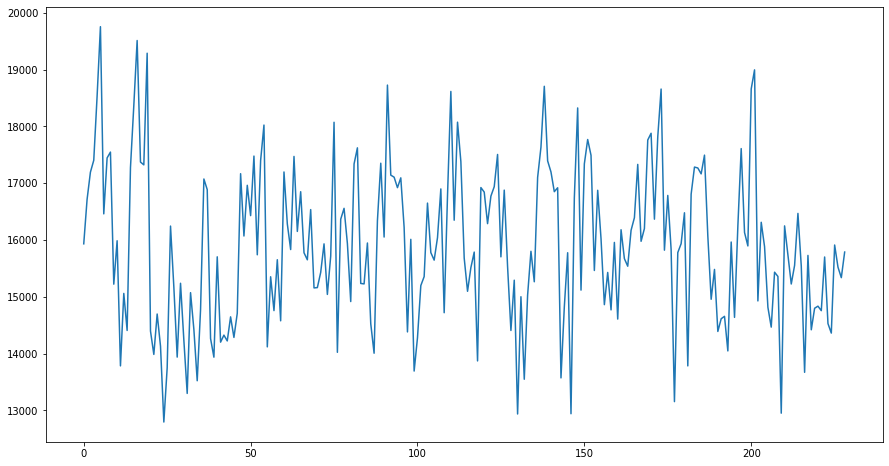

In [68]:
plt.plot(test_predict)

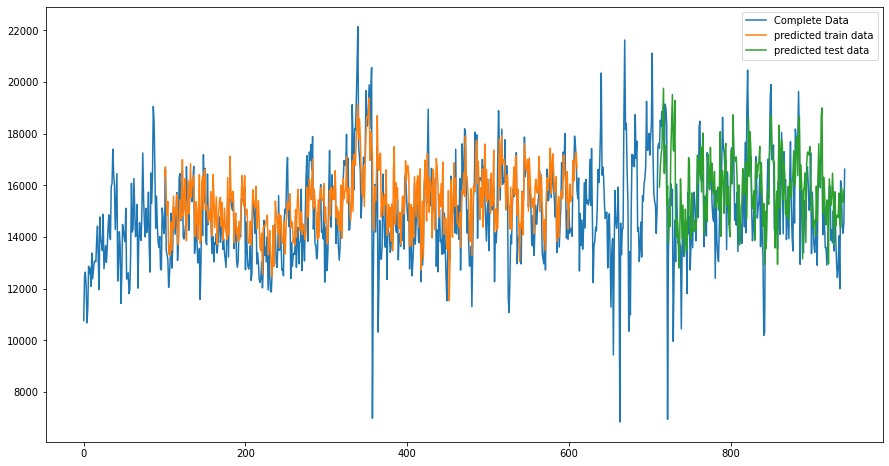

In [69]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Complete Data')
plt.plot(trainPredictPlot, label='predicted train data')
plt.plot(testPredictPlot, label='predicted test data')
plt.legend()
plt.show()

In [70]:
len(test_data)


330

In [71]:
x_input=test_data[230:].reshape(1,-1)
x_input.shape

(1, 100)

In [72]:
temp_input=list(x_input) # converting to a list
temp_input=temp_input[0].tolist() # storing the values here

In [73]:
temp_input #All my test_data is present here (previous 100 days data)

[0.6133407412249167,
 0.7613896333093666,
 0.7213216550101313,
 0.7846264461729524,
 0.8324400287600497,
 0.7824694424472187,
 0.8419504542780574,
 0.9121511209883,
 0.9268579645728479,
 0.8316556637688739,
 0.8374730374534283,
 0.8503496960585659,
 0.7450160141185699,
 0.7354729067259298,
 0.7447218772468789,
 0.7792339368586183,
 0.719295378782927,
 0.8041048434538205,
 0.7513236159226093,
 0.7373684554546049,
 0.7947578273089744,
 0.866461860252304,
 0.8003464278711028,
 0.7379894110726191,
 0.841917772403425,
 0.8025361134714688,
 0.8063272109288189,
 0.7307340349042422,
 0.751487025295771,
 0.7967841035361789,
 0.7319759461402706,
 0.8047911628210995,
 0.8545983397607686,
 0.7739721550428132,
 0.7350153604810772,
 0.7162886463167528,
 0.8147264527093274,
 0.7516504346689326,
 0.8705144127067128,
 0.859598666579515,
 0.8418524086541603,
 0.8551539316295182,
 0.9180992221713837,
 0.8615595790574548,
 0.699424799006471,
 0.795901692921106,
 0.7827962611935422,
 0.7429570560167331,
 0

In [74]:
len(temp_input)

100

In [75]:
# demonstrate prediction for next 80 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<80):
    
    if(len(temp_input)>100): # Now if there are greater than 100 elements, start from the 1st index element
        
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,1,n_steps))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,1, n_steps)) # All the previous 100 days data will be passed here
        yhat = model.predict(x_input, verbose=0) # it will be predicted here
        print(yhat[0]) # I obtain my yhat value
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) # Now I'm adding my yhat value inside my final o/p i.e lst_output
        i=i+1                            # Now I'm also adding my yhat value in my previous i/p i.e temp_input
                                         # Now temp_input will have 101 elements.
    

print(lst_output)

[0.75413436]
101
1 day input [0.76138963 0.72132166 0.78462645 0.83244003 0.78246944 0.84195045
 0.91215112 0.92685796 0.83165566 0.83747304 0.8503497  0.74501601
 0.73547291 0.74472188 0.77923394 0.71929538 0.80410484 0.75132362
 0.73736846 0.79475783 0.86646186 0.80034643 0.73798941 0.84191777
 0.80253611 0.80632721 0.73073403 0.75148703 0.7967841  0.73197595
 0.80479116 0.85459834 0.77397216 0.73501536 0.71628865 0.81472645
 0.75165043 0.87051441 0.85959867 0.84185241 0.85515393 0.91809922
 0.86155958 0.6994248  0.79590169 0.78279626 0.74295706 0.71406628
 0.75014707 0.77995294 0.75704294 0.81420354 0.82263547 0.79966011
 0.76792601 0.77554089 0.84041441 0.71305314 0.79060723 0.75821949
 0.72367475 0.71462187 0.73289104 0.76001699 0.69828093 0.78792732
 0.82391006 0.83090398 0.82904111 0.82828943 0.83783254 0.73694359
 0.78021439 0.75521276 0.72060265 0.72102752 0.69841166 0.71815151
 0.76769724 0.79694751 0.79825479 0.72994967 0.74285901 0.72661612
 0.76727237 0.71622328 0.79113014

In [76]:
lst_output

[[0.7541343569755554],
 [0.8248297572135925],
 [0.8305336833000183],
 [0.7659943699836731],
 [0.7614927887916565],
 [0.7428717017173767],
 [0.7882805466651917],
 [0.7036564350128174],
 [0.7645035982131958],
 [0.7625847458839417],
 [0.7464470863342285],
 [0.8158776164054871],
 [0.7994493842124939],
 [0.8128007054328918],
 [0.7543393969535828],
 [0.8034425377845764],
 [0.8193082213401794],
 [0.7923699021339417],
 [0.8079895377159119],
 [0.7734630703926086],
 [0.768166720867157],
 [0.7000369429588318],
 [0.736636221408844],
 [0.7645815014839172],
 [0.7504740357398987],
 [0.7765604853630066],
 [0.8012060523033142],
 [0.8200649619102478],
 [0.7767680883407593],
 [0.8125900030136108],
 [0.8098219633102417],
 [0.7822955846786499],
 [0.7995994687080383],
 [0.7905030250549316],
 [0.7857388854026794],
 [0.7167757153511047],
 [0.782935380935669],
 [0.7781627774238586],
 [0.7590090036392212],
 [0.7808856964111328],
 [0.770508348941803],
 [0.8029971718788147],
 [0.7779263854026794],
 [0.84123909473

In [77]:
len(lst_output)

80

In [78]:
fnl_output=scaler.inverse_transform(lst_output)

In [79]:
fnl_output

array([[14614.00305474],
       [16777.14091122],
       [16951.66964161],
       [14976.89573276],
       [14839.15635145],
       [14269.38832915],
       [15658.80816686],
       [13069.47959852],
       [14931.28109813],
       [14872.56805456],
       [14378.78794765],
       [16503.22330678],
       [16000.55225813],
       [16409.07598484],
       [14620.27686799],
       [16122.73477113],
       [16608.19295657],
       [15783.93426549],
       [16261.86387503],
       [15205.42302787],
       [15043.36532509],
       [12958.73038065],
       [14078.59510267],
       [14933.6647824 ],
       [14502.00454557],
       [15300.19773114],
       [16054.30278838],
       [16631.34770453],
       [15306.54996705],
       [16402.62891221],
       [16317.93243337],
       [15475.6803    ],
       [16005.14454353],
       [15726.81156063],
       [15581.03841555],
       [13470.90333831],
       [15495.25678587],
       [15349.22466362],
       [14763.15749335],
       [15432.54053879],


In [80]:
len(fnl_output)

80

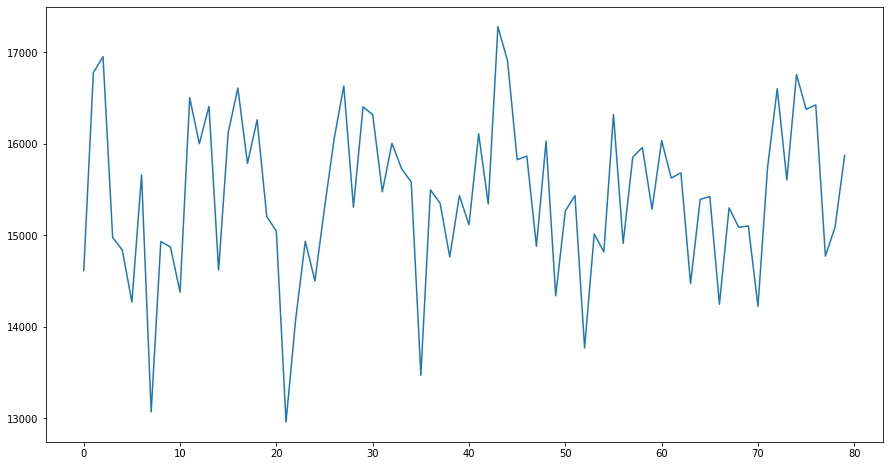

In [81]:
plt.plot(fnl_output)

In [82]:
import matplotlib.pyplot as plt

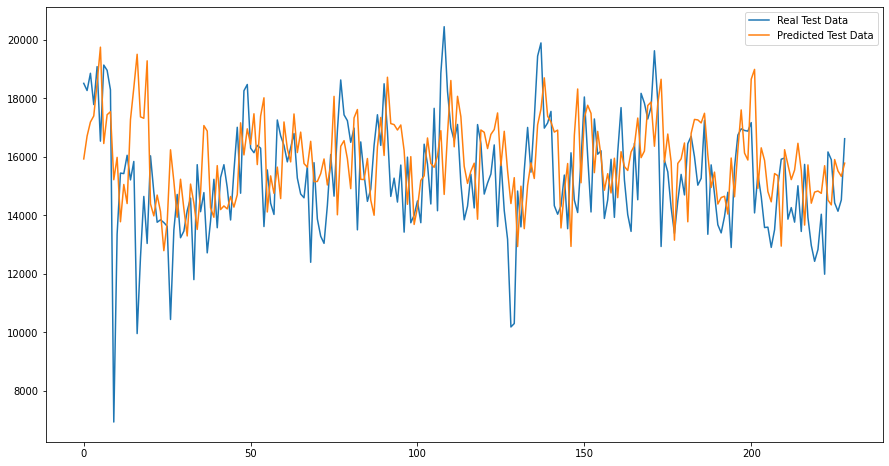

In [83]:
plt.plot(scaler.inverse_transform(df1[713:]),label='Real Test Data')
plt.plot(test_predict, label='Predicted Test Data')
plt.legend()
plt.show()

In [84]:
date = pd.date_range(start='2015/08/01', periods=80, freq='D')
date

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31', '2015-09-01',
               '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-05',
               '2015-09-06', '2015-09-07', '2015-09-08', '2015-09-09',
               '2015-09-10', '2015-09-11', '2015-09-12', '2015-09-13',
               '2015-09-14', '2015-09-15', '2015-09-16', '2015-09-17',
               '2015-09-18', '2015-09-19', '2015-09-20', '2015-09-21',
               '2015-09-22', '2015-09-23', '2015-09-24', '2015-09-25',
      

In [85]:
ff=pd.DataFrame(fnl_output, columns=['Forecast'])

In [86]:
ff

,Forecast
0,14614.003055
1,16777.140911
2,16951.669642
3,14976.895733
4,14839.156351
...,...
75,16376.594411
76,16425.052323
77,14771.847819
78,15087.978703


In [87]:
ff['Time_Stamp'] = pd.DataFrame(date)

In [88]:
ff

,Forecast,Time_Stamp
0,14614.003055,2015-08-01
1,16777.140911,2015-08-02
2,16951.669642,2015-08-03
3,14976.895733,2015-08-04
4,14839.156351,2015-08-05
...,...,...
75,16376.594411,2015-10-15
76,16425.052323,2015-10-16
77,14771.847819,2015-10-17
78,15087.978703,2015-10-18


In [89]:
ff=ff.set_index('Time_Stamp')

In [90]:
ff

,Forecast
Time_Stamp,
2015-08-01,14614.003055
2015-08-02,16777.140911
2015-08-03,16951.669642
2015-08-04,14976.895733
2015-08-05,14839.156351
...,...
2015-10-15,16376.594411
2015-10-16,16425.052323
2015-10-17,14771.847819


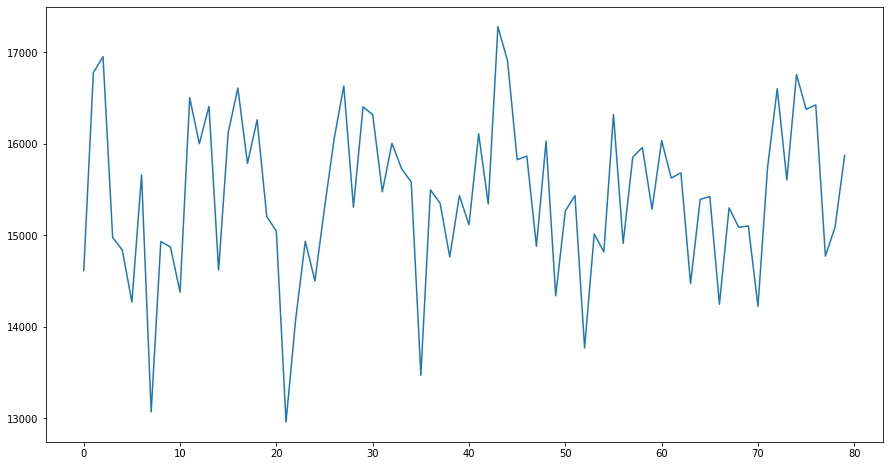

In [91]:
plt.plot(fnl_output)

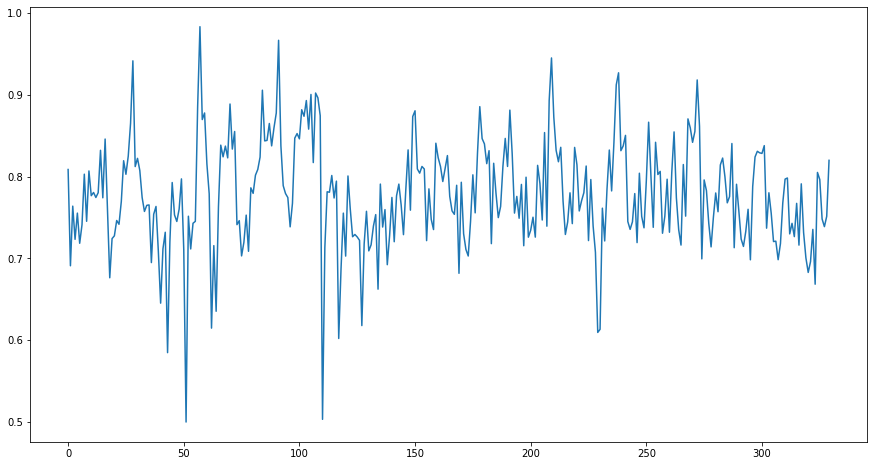

In [92]:
plt.plot(test_data)

In [93]:
day_new1=np.arange(1,331)
day_pred1=np.arange(331,411)

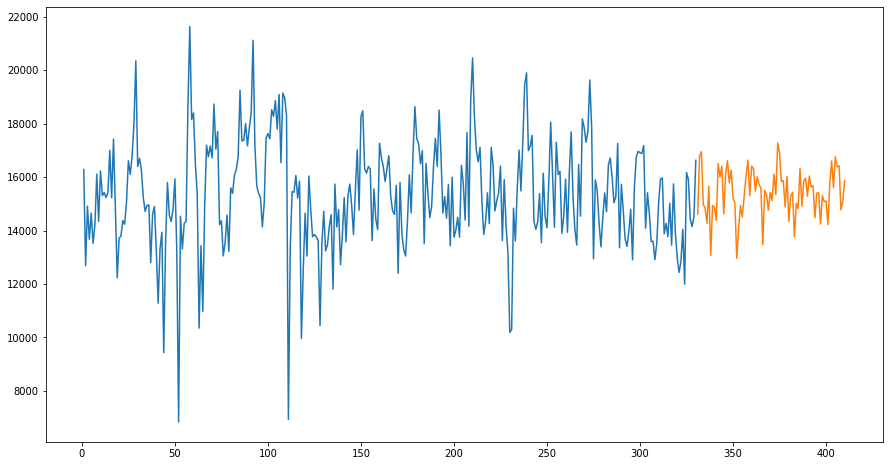

In [94]:
plt.plot(day_new1,scaler.inverse_transform(df1[612:]))
plt.plot(day_pred1,fnl_output)

In [95]:
daynew2=np.arange(1,230)
day3fore=np.arange(230,310)

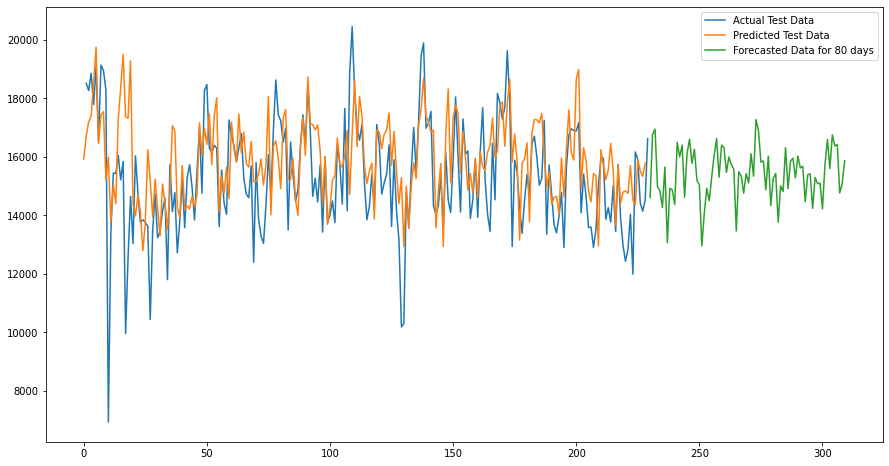

In [96]:
plt.plot(daynew2,scaler.inverse_transform(df1[713:]), label='Actual Test Data')
plt.plot(test_predict,label='Predicted Test Data')
plt.plot(day3fore,fnl_output, label='Forecasted Data for 80 days')
plt.legend()
plt.show()

In [97]:
vv=atr2.iloc[212:292]
vv.head()

,Sales
Date,
2013-08-01,14139
2013-08-02,15612
2013-08-03,12954
2013-08-04,13392
2013-08-05,12999


In [98]:
vv.tail()

,Sales
Date,
2013-10-15,13689
2013-10-16,13151
2013-10-17,13370
2013-10-18,14963
2013-10-19,14234


In [99]:
len(vv)

80

In [100]:
jj=atr2.iloc[577:657]

In [101]:
jj.head()

,Sales
Date,
2014-08-01,16761
2014-08-02,15521
2014-08-03,16139
2014-08-04,16785
2014-08-05,15835


In [102]:
jj.tail()

,Sales
Date,
2014-10-15,11284
2014-10-16,13314
2014-10-17,13935
2014-10-18,9433
2014-10-19,13575


In [103]:
len(jj)

80

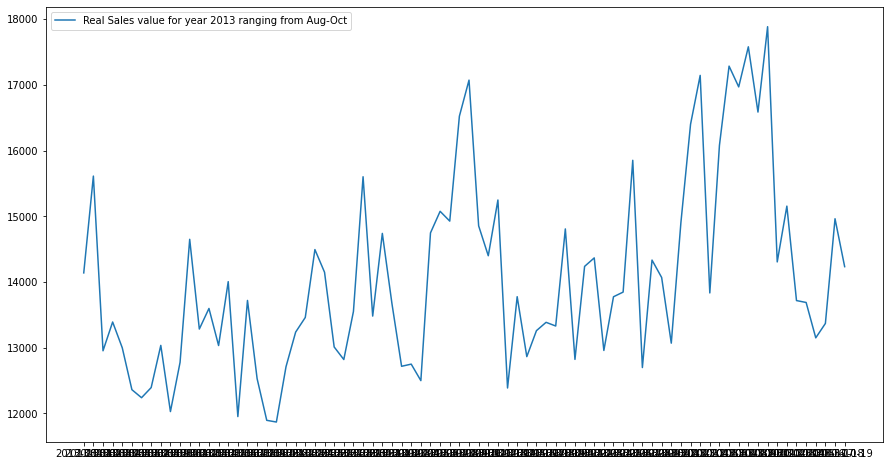

In [104]:
plt.plot(vv['Sales'], label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

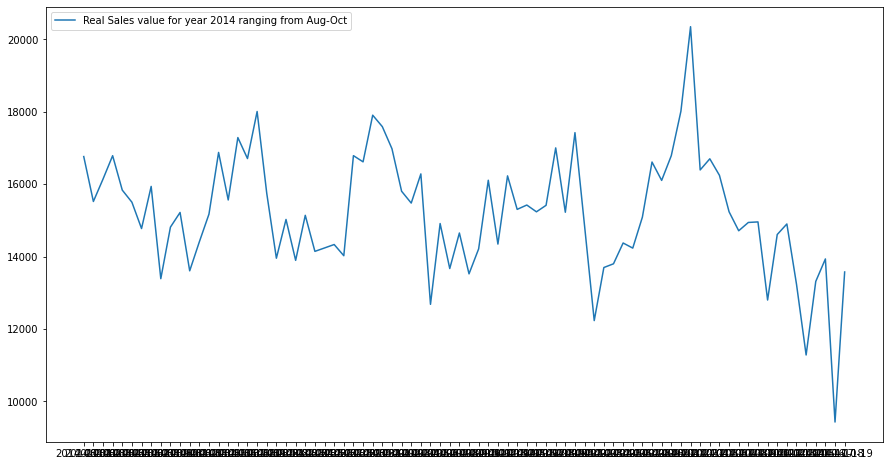

In [105]:
plt.plot(jj['Sales'],label='Real Sales value for year 2014 ranging from Aug-Oct')
plt.legend()
plt.show()

In [106]:
a1=vv.reset_index()['Sales']

In [107]:
a1

0     14139
1     15612
2     12954
3     13392
4     12999
      ...  
75    13689
76    13151
77    13370
78    14963
79    14234
Name: Sales, Length: 80, dtype: int64

In [108]:
len(a1)

80

In [109]:
b1=jj.reset_index()['Sales']

In [110]:
b1

0     16761
1     15521
2     16139
3     16785
4     15835
      ...  
75    11284
76    13314
77    13935
78     9433
79    13575
Name: Sales, Length: 80, dtype: int64

In [111]:
len(b1)

80

In [112]:
len(train_predict)

511

In [113]:
atr2.iloc[101:612]

,Sales
Date,
2013-04-12,16630
2013-04-13,13477
2013-04-14,13309
2013-04-15,13137
2013-04-16,12046
...,...
2014-08-31,17903
2014-09-01,17587
2014-09-02,16977


In [114]:
date1 = pd.date_range(start='2013/04/12', periods=511, freq='D')
date1

DatetimeIndex(['2013-04-12', '2013-04-13', '2013-04-14', '2013-04-15',
               '2013-04-16', '2013-04-17', '2013-04-18', '2013-04-19',
               '2013-04-20', '2013-04-21',
               ...
               '2014-08-26', '2014-08-27', '2014-08-28', '2014-08-29',
               '2014-08-30', '2014-08-31', '2014-09-01', '2014-09-02',
               '2014-09-03', '2014-09-04'],
              dtype='datetime64[ns]', length=511, freq='D')

In [115]:
njc=pd.DataFrame(train_predict, columns=['Predicted Train Data'])

In [116]:
njc

,Predicted Train Data
0,16364.498047
1,16705.923828
2,15404.211914
3,14842.460938
4,15373.233398
...,...
506,16159.770508
507,16836.664062
508,17128.777344
509,17290.197266


In [117]:
njc['time_Stamp'] = pd.DataFrame(date1)

In [118]:
njc

,Predicted Train Data,time_Stamp
0,16364.498047,2013-04-12
1,16705.923828,2013-04-13
2,15404.211914,2013-04-14
3,14842.460938,2013-04-15
4,15373.233398,2013-04-16
...,...,...
506,16159.770508,2014-08-31
507,16836.664062,2014-09-01
508,17128.777344,2014-09-02
509,17290.197266,2014-09-03


In [119]:
njc=njc.set_index('time_Stamp')

In [120]:
njc

,Predicted Train Data
time_Stamp,
2013-04-12,16364.498047
2013-04-13,16705.923828
2013-04-14,15404.211914
2013-04-15,14842.460938
2013-04-16,15373.233398
...,...
2014-08-31,16159.770508
2014-09-01,16836.664062
2014-09-02,17128.777344


In [121]:
njc.iloc[111:191]

,Predicted Train Data
time_Stamp,
2013-08-01,15240.140625
2013-08-02,15143.335938
2013-08-03,15964.624023
2013-08-04,14322.253906
2013-08-05,14743.250000
...,...
2013-10-15,15407.555664
2013-10-16,14992.986328
2013-10-17,14349.402344


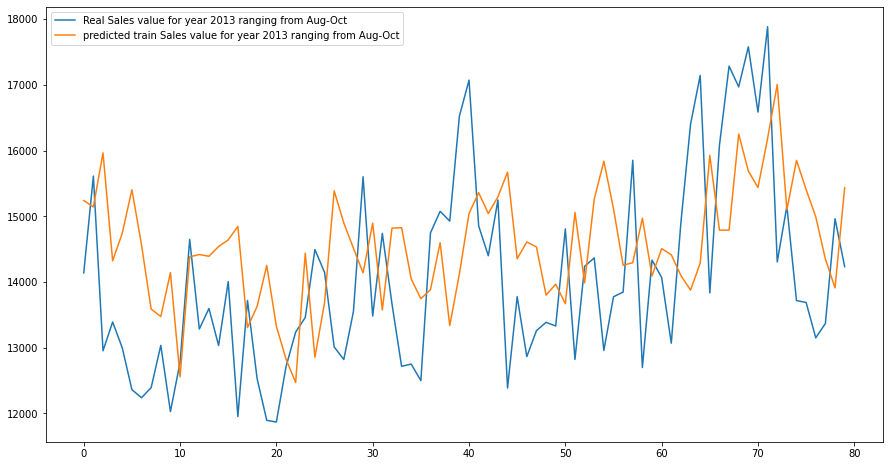

In [122]:
plt.plot(a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

In [123]:
daynewa=np.arange(1,81)
day3foreb=np.arange(81,161)

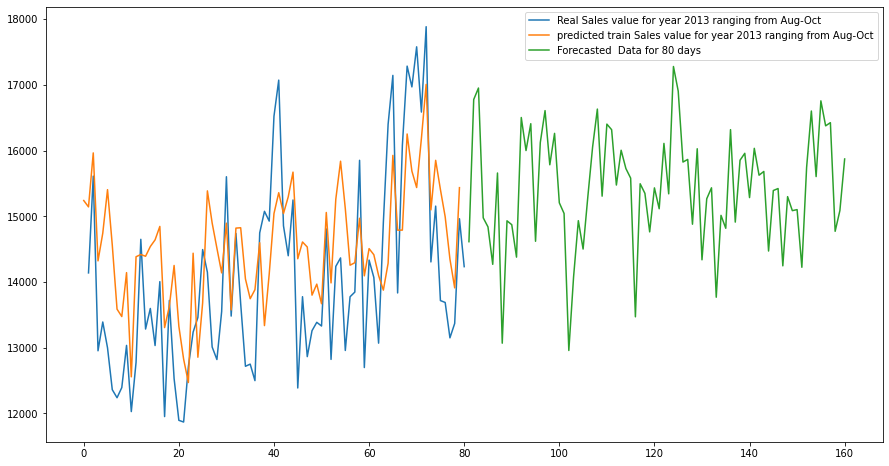

In [124]:
plt.plot(daynewa,a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.plot(day3foreb,fnl_output, label='Forecasted  Data for 80 days')
plt.legend()
plt.show()

In [125]:
nn=atr2.iloc[577:612]
nn.head()

,Sales
Date,
2014-08-01,16761
2014-08-02,15521
2014-08-03,16139
2014-08-04,16785
2014-08-05,15835


In [126]:
nn.tail()

,Sales
Date,
2014-08-31,17903
2014-09-01,17587
2014-09-02,16977
2014-09-03,15804
2014-09-04,15477


In [127]:
len(nn)

35

In [128]:
c1=nn.reset_index()['Sales']

In [129]:
c1

0     16761
1     15521
2     16139
3     16785
4     15835
5     15501
6     14774
7     15937
8     13390
9     14813
10    15218
11    13607
12    14406
13    15171
14    16875
15    15563
16    17285
17    16706
18    18005
19    15747
20    13955
21    15025
22    13896
23    15139
24    14144
25    14238
26    14333
27    14024
28    16786
29    16615
30    17903
31    17587
32    16977
33    15804
34    15477
Name: Sales, dtype: int64

In [130]:
len(c1)

35

In [131]:
njc.iloc[476:511]

,Predicted Train Data
time_Stamp,
2014-08-01,16576.845703
2014-08-02,17439.978516
2014-08-03,15679.113281
2014-08-04,16745.406250
2014-08-05,17217.876953
2014-08-06,16632.646484
2014-08-07,15755.901367
2014-08-08,15846.939453
2014-08-09,16331.941406


In [132]:
aar1=np.arange(1,36)
aar2=np.arange(36,71)

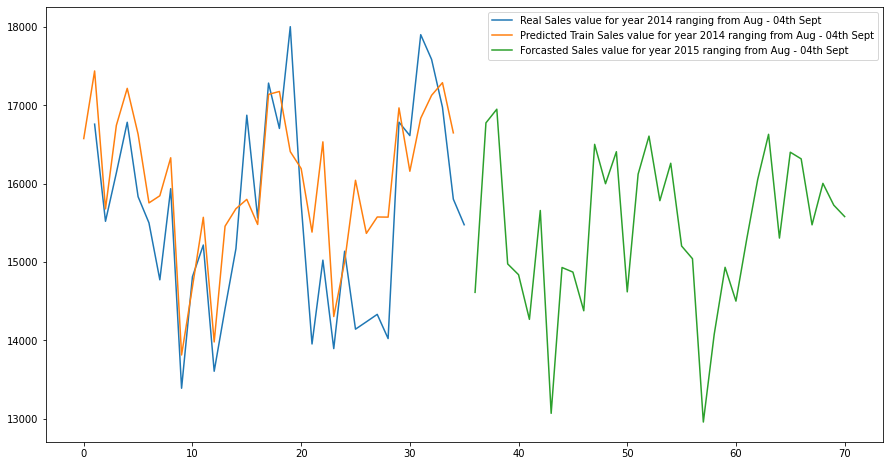

In [133]:
plt.plot(aar1,c1,label='Real Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(train_predict[476:511], label='Predicted Train Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(aar2,fnl_output[0:35], label='Forcasted Sales value for year 2015 ranging from Aug - 04th Sept')
plt.legend()
plt.show()

In [134]:
import jovian

In [135]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/ismailzain1697/bidirectional-rnn-store-733


'https://jovian.ai/ismailzain1697/bidirectional-rnn-store-733'